In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Direct transfer

In [2]:
# 1. read and filter for the final layer
df = pd.read_csv("probe_layer_transfer_direct.csv")
list(df)

['layer',
 'train_lang',
 'test_lang',
 'overall_acc',
 'overall_f1',
 'f1_past',
 'f1_present',
 'f1_future']

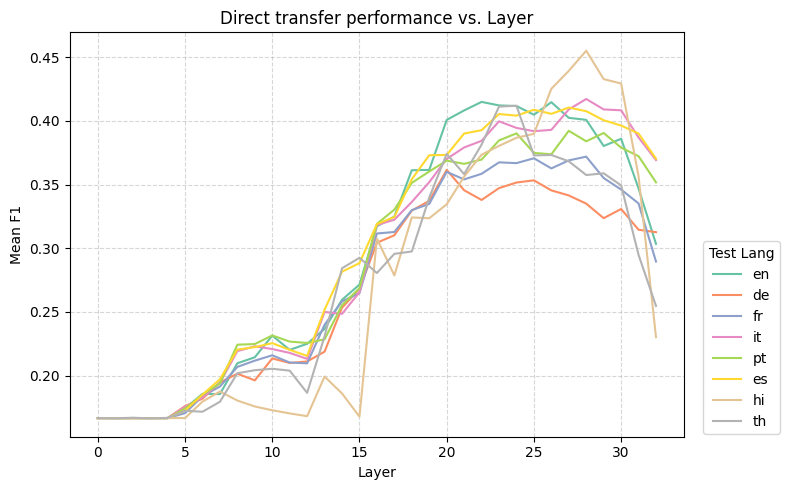

In [5]:
# 1. Compute mean_f1
df["mean_f1"] = df[["f1_past","f1_present","f1_future"]].mean(axis=1)

# 2. Exclude self‐transfer (train_lang == test_lang)
df_cross = df[df["train_lang"] != df["test_lang"]]

# 3. Group by layer & test_lang, averaging over remaining train_lang
df_group = (
    df_cross
    .groupby(["layer","test_lang"])["mean_f1"]
    .mean()
    .reset_index()
)

lang_order = ["en","de","fr","it","pt","es","hi","th"]
palette = sns.color_palette("Set1", n_colors=len(lang_order))

plt.figure(figsize=(8, 5))
sns.lineplot(
    data=df_group,
    x="layer",
    y="mean_f1",
    hue="test_lang",
    hue_order=lang_order,
    palette='Set2',
)
plt.xlabel("Layer")
plt.ylabel("Mean F1")
plt.title("Direct transfer performance vs. Layer")
plt.legend(title="Test Lang", bbox_to_anchor=(1.02, 0.5))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

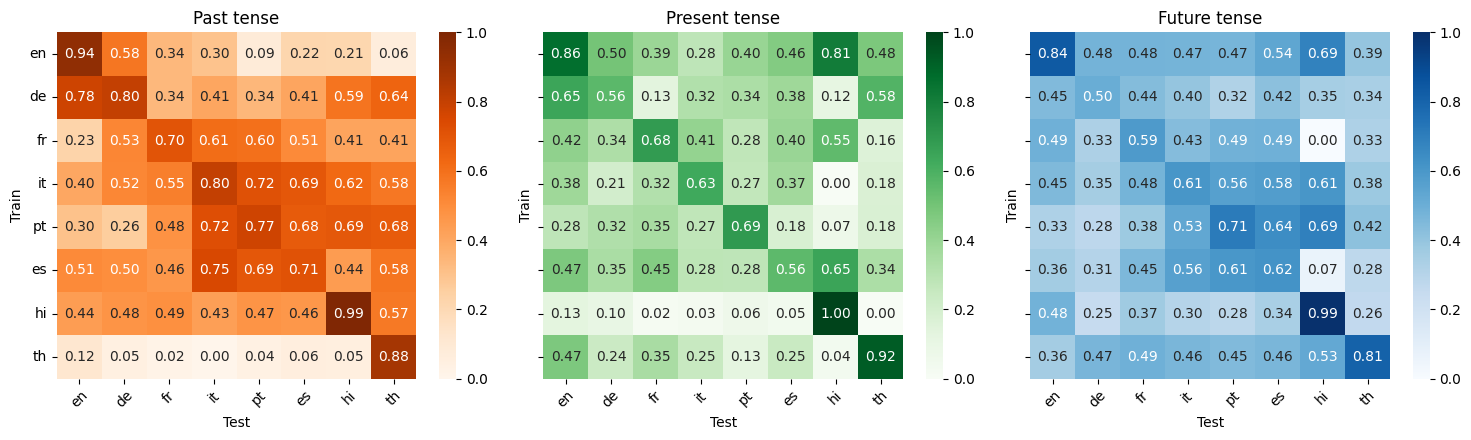

In [103]:
L = 25  # or whichever layer you choose
df_temp = df[df["layer"] == L]

# for each tense, pivot and plot heatmap
tenses = ["f1_past", "f1_present", "f1_future"]
lang_order = ["en","de","fr","it","pt","es","hi","th"]
palette = sns.cubehelix_palette(as_cmap=True)
# palette = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
cmaps = ["Oranges", "Greens", "Blues"]

fig, axes = plt.subplots(1, 3, figsize=(15, 4.5), sharex=True, sharey=True)
for ax, tense, cmap in zip(axes, tenses, cmaps):
    pivot = df_temp.pivot_table(
        index="train_lang",
        columns="test_lang",
        values=tense
    ).reindex(index=lang_order, columns=lang_order)
    sns.heatmap(
        pivot,
        ax=ax,
        vmin=0.0, vmax=1.0,     # fixed scale
        cmap=cmap,
        annot=True, fmt=".2f",
#         cbar=(ax is axes[-1])
        cbar=True
    )
    # Force each cell to be square so all heatmaps use the same aspect ratio
    ax.set_title(tense.replace("f1_", "").capitalize()+" tense")
    ax.set_xlabel("Test")
    ax.set_ylabel("Train")
    ax.set_xticklabels(lang_order, rotation=45)
    ax.set_yticklabels(lang_order, rotation=0)

plt.tight_layout()
plt.show()

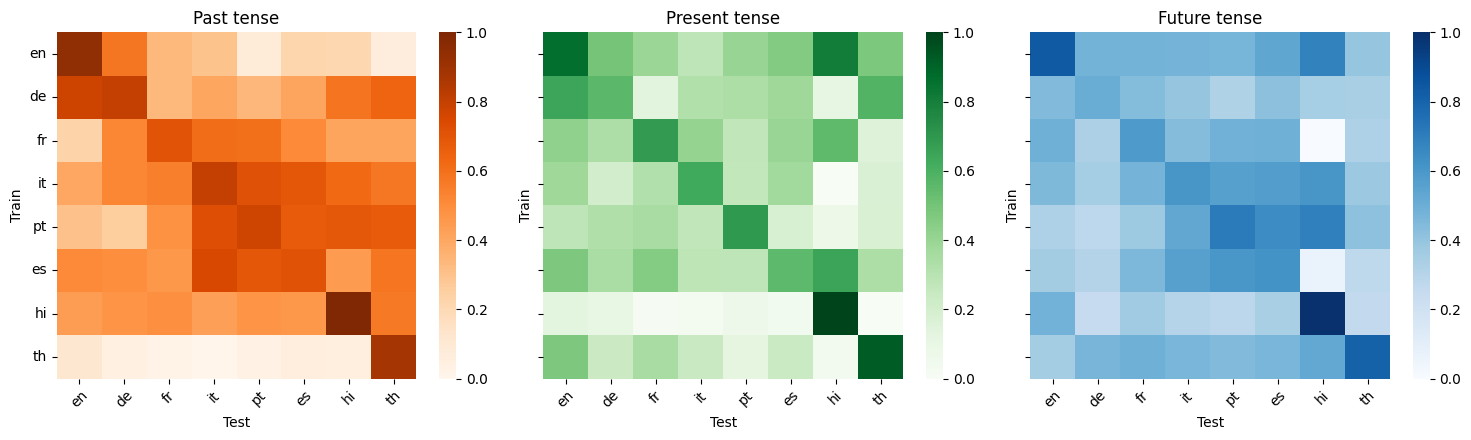

In [101]:
L = 25  # or whichever layer you choose
df_temp = df[df["layer"] == L]

# for each tense, pivot and plot heatmap
tenses = ["f1_past", "f1_present", "f1_future"]
lang_order = ["en","de","fr","it","pt","es","hi","th"]
palette = sns.cubehelix_palette(as_cmap=True)
# palette = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
cmaps = ["Oranges", "Greens", "Blues"]

fig, axes = plt.subplots(1, 3, figsize=(15, 4.5), sharex=True, sharey=True)
for ax, tense, cmap in zip(axes, tenses, cmaps):
    pivot = df_temp.pivot_table(
        index="train_lang",
        columns="test_lang",
        values=tense
    ).reindex(index=lang_order, columns=lang_order)
    sns.heatmap(
        pivot,
        ax=ax,
        vmin=0.0, vmax=1.0,     # fixed scale
        cmap=cmap,
#         annot=True, fmt=".2f",
#         cbar=(ax is axes[-1])
        cbar=True
    )
    # Force each cell to be square so all heatmaps use the same aspect ratio
    ax.set_title(tense.replace("f1_", "").capitalize()+" tense")
    ax.set_xlabel("Test")
    ax.set_ylabel("Train")
    ax.set_xticklabels(lang_order, rotation=45)
    ax.set_yticklabels(lang_order, rotation=0)

plt.tight_layout()
plt.show()

## Hold-one-out transfer

In [2]:
# 1. read and filter for the final layer
df_hold = pd.read_csv("probe_layer_transfer_hoo.csv")
list(df_hold)

['layer',
 'held_out_lang',
 'overall_acc',
 'overall_f1',
 'f1_past',
 'f1_present',
 'f1_future']

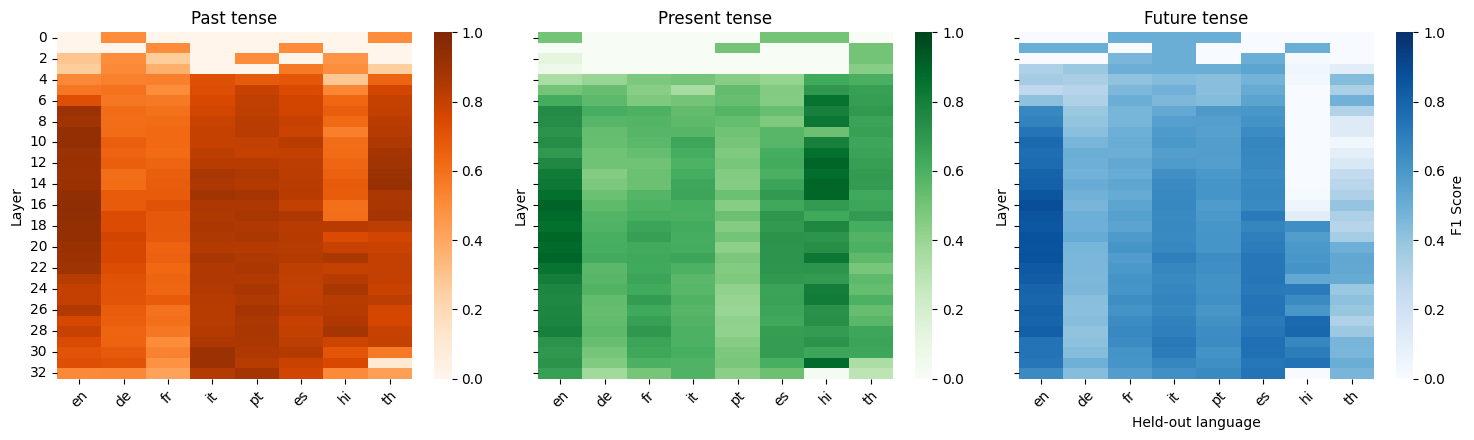

In [7]:
lang_order = ["en", "de", "fr", "it", "pt", "es", "hi", "th"]
layer_order = sorted(df_hold["layer"].unique(), key=lambda x: int(x))

tenses = ["f1_past", "f1_present", "f1_future"]
titles = ["Past", "Present", "Future"]
cmaps = ["Oranges", "Greens", "Blues"]

fig, axes = plt.subplots(1, 3, figsize=(15, 4.5), sharey=True)
palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

for ax, tense, title, cmap in zip(axes, tenses, titles, cmaps):
    # Pivot: rows = layer, columns = held_out_lang, values = this tense's F1
    pivot = (
        df_hold
        .pivot(index="layer", columns="held_out_lang", values=tense)
        .reindex(index=layer_order, columns=lang_order)
    )
    sns.heatmap(
        pivot,
        ax=ax,
        cmap=cmap,
        vmin=0.0, vmax=1.0,
        cbar=True,
        cbar_kws={"label": "F1 Score"} if ax is axes[-1] else {}
    )
    ax.set_title(f"{title} tense")
    ax.set_ylabel("Layer")
    if ax is axes[-1]:
        ax.set_xlabel("Held‐out language")
    else:
        ax.set_xlabel("")
    ax.tick_params(axis="x", rotation=45)
    ax.tick_params(axis="y", rotation=0)

plt.tight_layout()
plt.show()
